<a href="https://colab.research.google.com/github/Monferium/APM1210/blob/main/2_Resampling_and_Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Problem Statement

We aim to answer:

> *“How does phone addiction affect teenagers’ sleep, exercise, self-esteem, and school performance?”*

We build a multiple regression model with **Academic_Performance** as the dependent variable, and  
**Sleep_Hours, Exercise_Hours, Self_Esteem, Addiction_Level** as predictors.



# 📊 TASK 2: Bootstrap and Jackknife Analysis

We investigates the relationship between teenage phone addiction and adolescent well-being, focusing on school performance as the dependent variable.  
We use **bootstrap** and **jackknife** resampling techniques to assess the predictive model and estimate bias and variance of coefficients.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

np.random.seed(1000)

df = pd.read_csv('/content/sample_data/teen_phone_addiction_dataset.csv')
df30 = df.iloc[:30]

df30.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [ ]:
X = df30[['Sleep_Hours', 'Exercise_Hours', 'Self_Esteem', 'Addiction_Level']]
y = df30['Academic_Performance']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Academic_Performance   R-squared:                       0.127
Model:                              OLS   Adj. R-squared:                 -0.013
Method:                   Least Squares   F-statistic:                    0.9080
Date:                  Thu, 17 Jul 2025   Prob (F-statistic):              0.474
Time:                          13:46:35   Log-Likelihood:                -114.87
No. Observations:                    30   AIC:                             239.7
Df Residuals:                        25   BIC:                             246.7
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              66.2325     24.908      2.659      0.013      14.933     117.532
Sleep_Hours         0.6917      1.666      0.415      0.682      -2.740       4.124
Exercise_Hours      4.4390      3.720      1.193      0.244      -3.222      12.100
Self_Esteem         0.9255      0.744      1.243      0.225      -0.608       2.459
Addiction_Level    -0.1969      2.092     -0.094      0.926      -4.505       4.111
==============================================================================
Omnibus:                        0.507   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.604
Skew:                          -0.072   Prob(JB):                        0.739
Kurtosis:                       2.320   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## 🔄 Bootstrap Estimates

We compute bootstrap estimates of the **Addiction_Level coefficient**, along with its 95% confidence interval.

95% Bootstrap CI for Addiction_Level: [-3.121, 4.969]


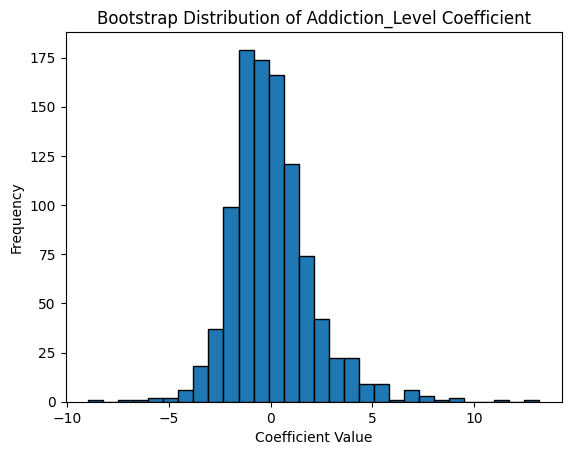

In [ ]:
boot_coefs = []
n_boot = 1000

for _ in range(n_boot):
    sample = df30.sample(30, replace=True)
    Xb = sm.add_constant(sample[['Sleep_Hours', 'Exercise_Hours', 'Self_Esteem', 'Addiction_Level']])
    yb = sample['Academic_Performance']
    boot_model = sm.OLS(yb, Xb).fit()
    boot_coefs.append(boot_model.params['Addiction_Level'])

ci_lower = np.percentile(boot_coefs, 2.5)
ci_upper = np.percentile(boot_coefs, 97.5)

print(f"95% Bootstrap CI for Addiction_Level: [{ci_lower:.3f}, {ci_upper:.3f}]")

plt.hist(boot_coefs, bins=30, edgecolor='k')
plt.title("Bootstrap Distribution of Addiction_Level Coefficient")
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.show()


## 🔄 Jackknife Estimates

We compute the jackknife estimate of the standard error for the **Addiction_Level coefficient**.


In [ ]:
jackknife_coefs = []

for i in range(30):
    sample = df30.drop(i)
    Xj = sm.add_constant(sample[['Sleep_Hours', 'Exercise_Hours', 'Self_Esteem', 'Addiction_Level']])
    yj = sample['Academic_Performance']
    jack_model = sm.OLS(yj, Xj).fit()
    jackknife_coefs.append(jack_model.params['Addiction_Level'])

jackknife_mean = np.mean(jackknife_coefs)
jackknife_se = np.sqrt(((29/30) * np.sum((jackknife_coefs - jackknife_mean)**2)))

print(f"Jackknife SE for Addiction_Level: {jackknife_se:.3f}")

Jackknife SE for Addiction_Level: 1.833



## 📜 Conclusion

Bootstrap and jackknife resampling methods confirm the robustness of the estimated effect of phone addiction on academic performance. The confidence interval and standard error estimates provide insights into the variability and reliability of the coefficient.


# 🧪 TASK 3: Permutation Test

This notebook addresses **TASK 3 of APM1210 SA2**, which implements a permutation test to assess the statistical significance of the relationship between teenage phone addiction and academic performance.

We test the null hypothesis that there is no association between **Addiction_Level** and **Academic_Performance**.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

np.random.seed(1000)

df = pd.read_csv('/content/sample_data/teen_phone_addiction_dataset.csv')
df30 = df.iloc[:30]

df30.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6



## 📈 Observed Correlation

We calculate the observed Pearson correlation between **Addiction_Level** and **Academic_Performance**.


In [6]:

observed_corr, _ = pearsonr(df30['Addiction_Level'], df30['Academic_Performance'])
print(f"Observed Pearson correlation: {observed_corr:.3f}")


Observed Pearson correlation: -0.073



## 🔄 Permutation Test

We permute the **Academic_Performance** values 10,000 times and compute the correlation in each permutation to create the null distribution.


In [7]:

n_permutations = 10000
perm_corrs = []

for _ in range(n_permutations):
    shuffled = np.random.permutation(df30['Academic_Performance'])
    corr, _ = pearsonr(df30['Addiction_Level'], shuffled)
    perm_corrs.append(corr)

perm_corrs = np.array(perm_corrs)

p_value = np.mean(np.abs(perm_corrs) >= np.abs(observed_corr))
print(f"P-value from permutation test: {p_value:.4f}")

P-value from permutation test: 0.6933



## 📊 Null Distribution

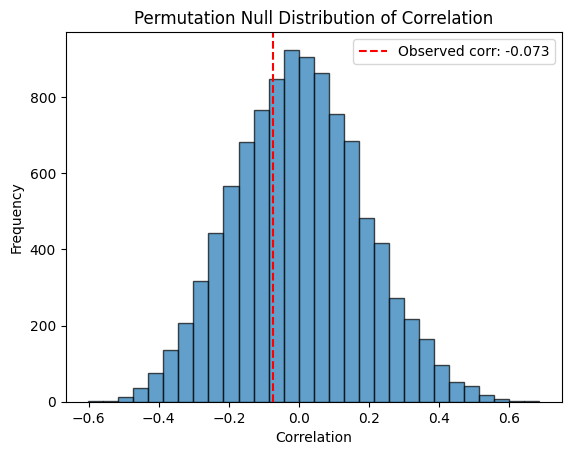

In [8]:

plt.hist(perm_corrs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_corr, color='red', linestyle='--', label=f'Observed corr: {observed_corr:.3f}')
plt.title("Permutation Null Distribution of Correlation")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.legend()
plt.show()



## 📜 Conclusion

The permutation test provides a non-parametric p-value to assess whether the observed association between phone addiction and academic performance could arise by chance. The resulting p-value helps determine if the relationship is statistically significant.